# Stack Overflow Data Base Respondents' Job Satisfaction Questions - 2017 Survey.

The dataset has more than 50,000 observations and 154 variables. On this data base I was interested in asking myself the following questions: 

Question 1: How does job satisfaction behave?

Question 2: If a person has high career satisfaction (CareerSatisfaction), will he/she also have high job satisfaction (JobSatisfaction)?

Question 3: What qualitative and quantitative variables influence an employee to have high JobSatisfaction?


## _Load libraries_

In [25]:
pip install statsmodels

Note: you may need to restart the kernel to use updated packages.


In [26]:
import numpy as np
import pandas as pd
import seaborn as sns
from pylab import *
from numpy import *
from IPython.display import display
from IPython.core.pylabtools import figsize, getfigs
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
from scipy.stats import pearsonr
import statsmodels.api as sm
from scipy import stats
import statsmodels.formula.api as smf
from IPython import display
%matplotlib inline
from IPython.display import display
from IPython.core.pylabtools import figsize, getfigs
plt.rcParams['image.cmap'] = "bwr"
plt.rcParams['figure.dpi'] = "100"
plt.rcParams['savefig.bbox'] = "tight"
style.use('ggplot') or plt.style.use('ggplot')

## _Load Database_

### _Base df (Public survey results)_

In [27]:
df = pd.read_csv('C:/Users/Teletrabajo/Desktop/1.UDACITY/Clase 1. The Data Science Process/Practica Libre/survey-results-public.csv')
df.head()

,Respondent,Professional,ProgramHobby,Country,University,EmploymentStatus,FormalEducation,MajorUndergrad,HomeRemote,CompanySize,...,StackOverflowMakeMoney,Gender,HighestEducationParents,Race,SurveyLong,QuestionsInteresting,QuestionsConfusing,InterestedAnswers,Salary,ExpectedSalary
0,1,Student,"Yes, both",United States,No,"Not employed, and not looking for work",Secondary school,NaN,NaN,NaN,...,Strongly disagree,Male,High school,White or of European descent,Strongly disagree,Strongly agree,Disagree,Strongly agree,NaN,NaN
1,2,Student,"Yes, both",United Kingdom,"Yes, full-time",Employed part-time,Some college/university study without earning ...,Computer science or software engineering,"More than half, but not all, the time",20 to 99 employees,...,Strongly disagree,Male,A master's degree,White or of European descent,Somewhat agree,Somewhat agree,Disagree,Strongly agree,NaN,37500.0
2,3,Professional developer,"Yes, both",United Kingdom,No,Employed full-time,Bachelor's degree,Computer science or software engineering,"Less than half the time, but at least one day ...","10,000 or more employees",...,Disagree,Male,A professional degree,White or of European descent,Somewhat agree,Agree,Disagree,Agree,113750.0,NaN
3,4,Professional non-developer who sometimes write...,"Yes, both",United States,No,Employed full-time,Doctoral degree,A non-computer-focused engineering discipline,"Less than half the time, but at least one day ...","10,000 or more employees",...,Disagree,Male,A doctoral degree,White or of European descent,Agree,Agree,Somewhat agree,Strongly agree,NaN,NaN
4,5,Professional developer,"Yes, I program as a hobby",Switzerland,No,Employed full-time,Master's degree,Computer science or software engineering,Never,10 to 19 employees,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### _Original database size_

The size of the original database is 51,392 rows or records by 154 columns or variables.

In [28]:
num_rows = df.shape[0] #number of rows
num_cols = df.shape[1] #number of columns
print('Número de filas: \n', num_rows,'\nNúmero de columnas: \n',num_cols)

Número de filas: 
 51392 
Número de columnas: 
 154


### _Descriptive statistics Quantitative Variables Database df_

Next we find that of the 145 variables, 6 are quantitative since the "Respondent" column is an identifier column. It is evident that the variable "ExpectedSalary" contains very little data (2,566) only 5% of the people answered that question.

In [29]:
df.describe()

,Respondent,CareerSatisfaction,JobSatisfaction,HoursPerWeek,StackOverflowSatisfaction,Salary,ExpectedSalary
count,51392.000000,42695.000000,40376.000000,20600.000000,36592.000000,12891.000000,2566.000000
mean,25696.500000,7.300574,6.957078,3.952282,8.429875,56298.480641,33142.220468
std,14835.736854,1.955444,2.167652,7.564722,1.390635,39880.905277,30162.988829
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,12848.750000,6.000000,6.000000,1.000000,8.000000,26440.371839,4490.492484
50%,25696.500000,8.000000,7.000000,1.000000,9.000000,50000.000000,29364.263691
75%,38544.250000,9.000000,8.000000,4.000000,10.000000,80000.000000,50403.225806
max,51392.000000,10.000000,10.000000,40.000000,10.000000,197000.000000,187500.000000


# Question 1)

##  _¿How job satisfaction behaves?_

Subsequently, a summary of descriptive statistics of the _JobSatisfaction_ variable will be calculated, where it can be seen that on average job satisfaction is 6.9, which means that most respondents have good job satisfaction. It is also evident that the 1st percentile (25%) is 6, therefore 75% of the respondents have a job satisfaction above 6, which is acceptable, as can be seen in the following table, bar chart and box plot.

In [30]:
df['JobSatisfaction'].describe()

count    40376.000000
mean         6.957078
std          2.167652
min          0.000000
25%          6.000000
50%          7.000000
75%          8.000000
max         10.000000
Name: JobSatisfaction, dtype: float64

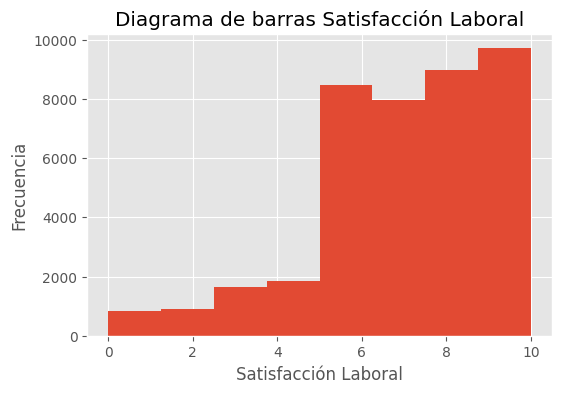

In [31]:
df['JobSatisfaction'].hist(bins=8) 
plt.xlabel("Satisfacción Laboral")
plt.ylabel("Frecuencia")
plt.title("Diagrama de barras Satisfacción Laboral")
plt.show()

C:\Users\Teletrabajo\anaconda3\envs\Udacity\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


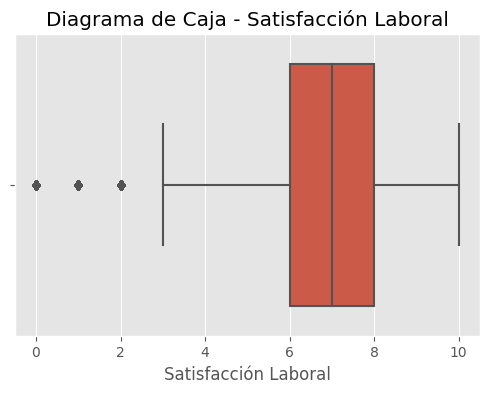

In [32]:
cajas=sns.boxplot(list(df['JobSatisfaction']))
plt.title("Diagrama de Caja - Satisfacción Laboral")
plt.xlabel("Satisfacción Laboral")
plt.show()

The following tables compare job satisfaction with employee status, company size and country. From this we conclude that the employees with the lowest job satisfaction are those with full-time contracts.

In [33]:
df2=df.groupby(['EmploymentStatus']).mean()['JobSatisfaction'].sort_values()
df2.head()

EmploymentStatus
Employed part-time                                      6.821468
Employed full-time                                      6.926805
Not employed, and not looking for work                  7.000000
Independent contractor, freelancer, or self-employed    7.252823
I prefer not to say                                          NaN
Name: JobSatisfaction, dtype: float64

It is also evident that the employees with the highest job satisfaction are those who work for companies with 10 to fewer employees, followed by companies with 10 to 19 employees; from here it is concluded that those with the highest job satisfaction are employees whose companies have few employees.

In [34]:
df.groupby(['CompanySize']).mean()['JobSatisfaction'].sort_values()

CompanySize
5,000 to 9,999 employees    6.748153
10,000 or more employees    6.810345
I don't know                6.842679
500 to 999 employees        6.883661
1,000 to 4,999 employees    6.884509
100 to 499 employees        6.937089
20 to 99 employees          6.949092
10 to 19 employees          7.000799
Fewer than 10 employees     7.008749
I prefer not to answer      7.280835
Name: JobSatisfaction, dtype: float64

Given the following tables we conclude that the countries with the lowest job satisfaction are Saint Lucia, Fiji and American Samoa, on the contrary the countries with the highest job satisfaction are: Macau, Libya and Angola.

In [35]:
country_comp=df.groupby(['Country']).mean()['JobSatisfaction'].sort_values().dropna()
# como ver los valores mas grandes primero?
country_comp[:20]

Country
Saint Lucia                    0.000000
Fiji                           0.000000
American Samoa                 0.000000
Martinique (French)            1.500000
North Korea                    2.000000
Somalia                        2.000000
French Guyana                  3.000000
Niger                          3.000000
Bhutan                         3.000000
Lesotho                        3.000000
Brunei Darussalam              3.000000
U.S. Minor Outlying Islands    3.000000
Eritrea                        3.000000
Swaziland                      3.500000
Falkland Islands               4.000000
Gabon                          4.000000
Saint Vincent & Grenadines     4.500000
Algeria                        4.823529
Northern Mariana Islands       5.000000
Turkmenistan                   5.000000
Name: JobSatisfaction, dtype: float64

In [36]:
country_comp=df.groupby(['Country']).mean()['JobSatisfaction'].sort_values(ascending=False).dropna()
# como ver los valores mas grandes primero?
country_comp[:20]

Country
Libya                             10.000000
Macau                             10.000000
Angola                             9.000000
Yemen                              9.000000
Anguilla                           9.000000
Laos                               9.000000
Andorra                            9.000000
New Caledonia (French)             8.666667
Suriname                           8.500000
Virgin Islands (USA)               8.200000
Iceland                            8.090909
Malawi                             8.000000
Tadjikistan                        8.000000
Gibraltar                          8.000000
Polynesia (French)                 8.000000
Bermuda                            8.000000
S. Georgia & S. Sandwich Isls.     8.000000
Puerto Rico                        7.937500
Qatar                              7.875000
Costa Rica                         7.804878
Name: JobSatisfaction, dtype: float64

# Question 2)

##  ¿_If a person has high career satisfaction (***CareerSatisfaction***), he/she will also have high job satisfaction (***JobSatisfaction***)?_

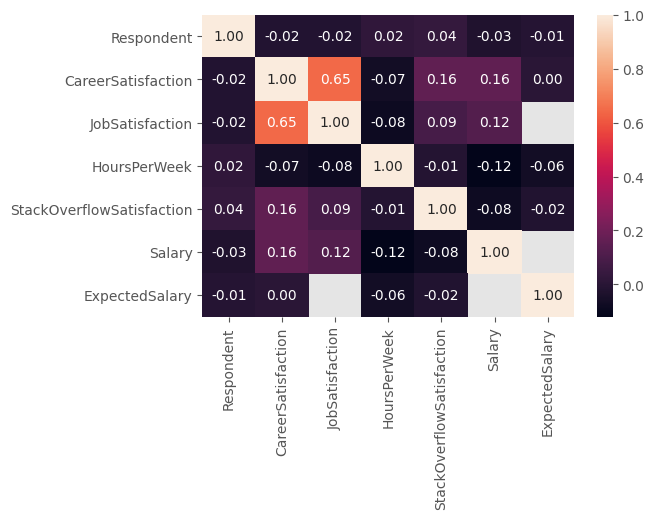

In [37]:
sns.heatmap(df.corr(), annot=True, fmt='.2f');

The correlation diagram above shows that among the quantitative variables, the highest linear relationship is found between the _JobSatisfaction_ and _CareerSatisfaction_ variables, with a correlation of 0.65. Having this correlation indicates that there are indications that the higher the career satisfaction, the higher the job satisfaction. Next we will perform a simple linear model to verify if this variable has an impact and what is its impact?

### Definition of the database for the realization of the model.

Given that the model will be made only with the _JobSatisfaction_ and _CareerSatisfaction_ variables, make a subset to the base with these two variables.

In [38]:
num_vars = df[['CareerSatisfaction', 'JobSatisfaction']]
num_vars.head()

,CareerSatisfaction,JobSatisfaction
0,NaN,NaN
1,NaN,NaN
2,8.0,9.0
3,6.0,3.0
4,6.0,8.0


Since the database contains null values we proceed to delete the rows with null values.

In [39]:
df_dropna = num_vars.dropna(axis=0)
df_dropna_rows = df_dropna.shape[0] #number of rows
df_dropna_cols = df_dropna.shape[1] #number of columns
print('Número de filas: \n', df_dropna_rows,'\nNúmero de columnas: \n',df_dropna_cols)

Número de filas: 
 40352 
Número de columnas: 
 2


# Simple linear model

In [40]:
X = df_dropna[['CareerSatisfaction']]
y = df_dropna['JobSatisfaction']

#Split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .30, random_state=42) 

lm_model = LinearRegression(normalize=True) # Instantiate
lm_model.fit(X_train, y_train) #Fit

      
#Predict and score the model
y_test_preds = lm_model.predict(X_test) 

print("Coeficiente de determinación R^2:", lm_model.score(X, y))
print('Independent term: \n', lm_model.intercept_)
print("Coeficiente:", list(zip(X.columns, lm_model.coef_.flatten(), )))



Coeficiente de determinación R^2: 0.41702156404404633
Independent term: 
 1.4086941268659379
Coeficiente: [('CareerSatisfaction', 0.7533886089776572)]


After performing the simple linear regression we observe that the R2 is equal to 0.4170 which indicates that the variable 'CareerSatisfaction' explains a part of the variable 'JobSatisfaction', however after testing with more variables in alternate exercises it fails to increase its r2, therefore we review the Prob (F-statistic) and P_value statistics of the variable 'CareerSatisfaction', to determine if it is significant.

In [41]:
X_train = sm.add_constant(X_train, prepend=True)
modelo = sm.OLS(endog=y_train, exog=X_train,)
modelo = modelo.fit()
print(modelo.summary())

                            OLS Regression Results                            
Dep. Variable:        JobSatisfaction   R-squared:                       0.426
Model:                            OLS   Adj. R-squared:                  0.426
Method:                 Least Squares   F-statistic:                 2.093e+04
Date:                Tue, 09 Feb 2021   Prob (F-statistic):               0.00
Time:                        20:46:00   Log-Likelihood:                -54283.
No. Observations:               28246   AIC:                         1.086e+05
Df Residuals:                   28244   BIC:                         1.086e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  1.4087      0

It is evident that the probability of the F statistic, Prob(F-statistic)=0.00 is less than 0. 05% , with a level of 95% we can reject the null hypothesis (Ho), that is to say that the model is explanatory, therefore the variable _'CareerSatisfaction'_ of the model has an effect on the response variable _'CareerSatisfaction'_ and we also observe that the p_value (P>|t|) of the variable _'CareerSatisfaction'_ is 0.000, less than 0.05%, that is to say that it is significant for the model.

Therefore, we conclude that the degree of satisfaction with a career has an influence on job satisfaction, but it is not enough to explain job satisfaction; therefore, there must be other variables that also contribute to greater job satisfaction.

# Question 3)

##  What qualitative and quantitative variables influence an employee to have high job satisfaction (***JobSatisfaction***)?_

Since the database contains more than 140 qualitative variables, we selected the qualitative variables that are more related to the working conditions such as: _'EmploymentStatus'_, _'CompanySize'_ and _'SeriousWork'_, this selection of variables is made depending on the researcher's point of view.

In [42]:
num_vars2 = df[['JobSatisfaction','EmploymentStatus','CompanySize','SeriousWork']]
num_vars2.head()

,JobSatisfaction,EmploymentStatus,CompanySize,SeriousWork
0,NaN,"Not employed, and not looking for work",NaN,Strongly agree
1,NaN,Employed part-time,20 to 99 employees,NaN
2,9.0,Employed full-time,"10,000 or more employees",Agree
3,3.0,Employed full-time,"10,000 or more employees",Strongly agree
4,8.0,Employed full-time,10 to 19 employees,NaN


Since the database contains null values we proceed to delete the rows with null values.

In [43]:
datos = num_vars2.dropna(axis=0)
datos.shape
print('(# filas,# Columnas)=', datos.shape)

(# filas,# Columnas)= (22498, 4)


In [44]:
datos.head()

,JobSatisfaction,EmploymentStatus,CompanySize,SeriousWork
2,9.0,Employed full-time,"10,000 or more employees",Agree
3,3.0,Employed full-time,"10,000 or more employees",Strongly agree
8,6.0,Employed full-time,"5,000 to 9,999 employees",Strongly agree
14,8.0,Employed full-time,"5,000 to 9,999 employees",Agree
17,8.0,Employed full-time,"1,000 to 4,999 employees",Agree


## Multiple linear model

In order to analyze qualitative variables in the multiple linear regression model, it is necessary to convert each category of each variable into 1 column respectively, this process is known as "one-hot encoding".

In [45]:
datos2=pd.get_dummies(datos, columns=["EmploymentStatus","CompanySize","SeriousWork"]).head()

In [46]:
datos2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5 entries, 2 to 17
Data columns (total 20 columns):
 #   Column                                                                 Non-Null Count  Dtype  
---  ------                                                                 --------------  -----  
 0   JobSatisfaction                                                        5 non-null      float64
 1   EmploymentStatus_Employed full-time                                    5 non-null      uint8  
 2   EmploymentStatus_Employed part-time                                    5 non-null      uint8  
 3   EmploymentStatus_Independent contractor, freelancer, or self-employed  5 non-null      uint8  
 4   EmploymentStatus_Not employed, and not looking for work                5 non-null      uint8  
 5   CompanySize_1,000 to 4,999 employees                                   5 non-null      uint8  
 6   CompanySize_10 to 19 employees                                         5 non-null      uint8 

After obtaining the base, all the variables are introduced into the model in order to determine which are the most relevant.

In [47]:
X = datos2[['EmploymentStatus_Employed full-time','EmploymentStatus_Employed part-time',
            'CompanySize_Fewer than 10 employees','CompanySize_10 to 19 employees','CompanySize_20 to 99 employees',
            'CompanySize_100 to 499 employees','CompanySize_500 to 999 employees','CompanySize_1,000 to 4,999 employees',
            'CompanySize_5,000 to 9,999 employees', 'CompanySize_10,000 or more employees',
            'SeriousWork_Agree','SeriousWork_Disagree','SeriousWork_Somewhat agree',
            'SeriousWork_Strongly agree', 'SeriousWork_Strongly disagree']]
y = datos2['JobSatisfaction']

#Split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .30, random_state=42) 

X_train = sm.add_constant(X_train, prepend=True)
modelo2 = sm.OLS(endog=y_train, exog=X_train,)
modelo2 = modelo2.fit()
print(modelo2.summary())


                            OLS Regression Results                            
Dep. Variable:        JobSatisfaction   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                    nan
Method:                 Least Squares   F-statistic:                       nan
Date:                Tue, 09 Feb 2021   Prob (F-statistic):                nan
Time:                        20:46:30   Log-Likelihood:                 95.299
No. Observations:                   3   AIC:                            -184.6
Df Residuals:                       0   BIC:                            -187.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                                           coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------


C:\Users\Teletrabajo\anaconda3\envs\Udacity\lib\site-packages\statsmodels\stats\stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 3 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "
C:\Users\Teletrabajo\anaconda3\envs\Udacity\lib\site-packages\statsmodels\regression\linear_model.py:1728: RuntimeWarning: divide by zero encountered in true_divide
  return 1 - (np.divide(self.nobs - self.k_constant, self.df_resid)
C:\Users\Teletrabajo\anaconda3\envs\Udacity\lib\site-packages\statsmodels\regression\linear_model.py:1728: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - (np.divide(self.nobs - self.k_constant, self.df_resid)
C:\Users\Teletrabajo\anaconda3\envs\Udacity\lib\site-packages\statsmodels\regression\linear_model.py:1650: RuntimeWarning: divide by zero encountered in double_scalars
  return np.dot(wresid, wresid) / self.df_resid
C:\Users\Teletrabajo\anaconda3\envs\Udacity\lib\site-p

After running the model, we found that there are multicollinearity problems, since all the columns were entered into the model. Consequently, several interactions were performed selecting different variables and the model presented below is the best model that iterated with an R2 equal to 89.3% and indicates that the _'EmploymentStatus'_ variable is significant for the model, that is to say that the employee's status positively influences the worker's satisfaction.

In [48]:
X = datos2[['EmploymentStatus_Employed full-time','SeriousWork_Strongly agree']]
y = datos2['JobSatisfaction']

#Split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .30, random_state=42) 

X_train = sm.add_constant(X_train, prepend=True)
modelo3 = sm.OLS(endog=y_train, exog=X_train,)
modelo3 = modelo3.fit()
print(modelo3.summary())

                            OLS Regression Results                            
Dep. Variable:        JobSatisfaction   R-squared:                       0.893
Model:                            OLS   Adj. R-squared:                  0.786
Method:                 Least Squares   F-statistic:                     8.333
Date:                Tue, 09 Feb 2021   Prob (F-statistic):              0.212
Time:                        20:46:35   Log-Likelihood:                -1.5692
No. Observations:                   3   AIC:                             7.138
Df Residuals:                       1   BIC:                             5.336
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
Em

C:\Users\Teletrabajo\anaconda3\envs\Udacity\lib\site-packages\statsmodels\stats\stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 3 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


*** After asking the question: _Which other qualitative variables are significant and influence an employee's job satisfaction?_, find out by replicating this code with other variables.***